In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def read_log_txt(log_text_file):   
    iou_data = np.array(pd.read_table(log_text_file, 
                                      delimiter=',',
                                      header=None))
    iou_per_class = iou_data[:,:-1]
    miou = iou_data[:,-1]
    return iou_per_class, miou

def plot_per_class(log_text_file):
    iou_per_class, _ = read_log_txt(log_text_file)
    class_n = iou_per_class.shape[1]
    for i in range(class_n):
        plt.plot(iou_per_class[:,i], label=str(i+1))
    plt.ylim(0,1)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('iou')
    plt.title(log_text_file)
    plt.show()

def plot_per_arch(log_text_file_list):
    for log_text_file in log_text_file_list:
        try:
            miou = read_log_txt(log_text_file)[1]
            plt.plot(miou, label=log_text_file)
        except:
            continue
    plt.ylim(0,1)
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('iou')
    plt.show()
    

In [ ]:
log_text_file_list=['./cmplog/Unetresnet18.txt',
                    './cmplog/Unetresnet50.txt',
                    './cmplog/Unetresnet101.txt',
                    './cmplog/FPNresnet18.txt',
                    './cmplog/FPNresnet50.txt',
                    './cmplog/FPNresnet101.txt',]

In [ ]:
plot_per_arch(log_text_file_list)

In [ ]:
for log_text_file in log_text_file_list:
    try:
        plot_per_class(log_text_file)
    except:
        continue

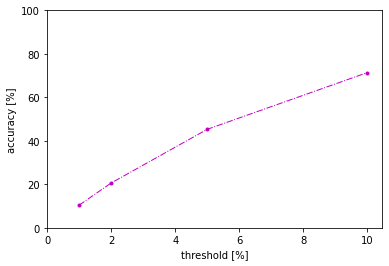

In [18]:
acc = np.array([10.4,20.6,45.3,71.4])
threshold = np.array([1,2,5,10])
plt.plot(threshold, acc, 'm.-.', linewidth=1)
plt.xlim(0)
plt.ylim(0,100)
plt.xlabel('threshold [%]')
plt.ylabel('accuracy [%]')
plt.savefig('../img/depth_result.png',dpi=200)